<a href="https://colab.research.google.com/github/inschools-ng/MitsLinReg2/blob/main/Homework_1_Number_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question Number 5:

Using the “Target Marketing” dataset to predict the success of a bank’s telemarketing
strategy. Success is measured on whether a customer subscribes to a term deposit, which
is denoted as “y” in the dataset. Interpret the results.

In [1]:
import pandas as pd
import numpy as np # for data manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualisation
from pylab import rcParams


import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


The BikeShare dataset has been uploaded to a Github Account.

This notebook will be cloning and reading the files directly from the Github repository.

In [2]:
!git clone "https://github.com/inschools-ng/MitsLinReg2.git"

Cloning into 'MitsLinReg2'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 34 (delta 9), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (34/34), 2.86 MiB | 9.17 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [4]:
df = pd.read_csv("/content/MitsLinReg2/Target_Marketing.csv")
#df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)

In [5]:
print('\n', df.head())
print('\n', df.tail())


    age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4 

In [6]:
print('\nNumber of rows and Columns in the data set: ', df.shape)


Number of rows and Columns in the data set:  (41188, 21)


In [7]:
print(df.describe())


               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000      

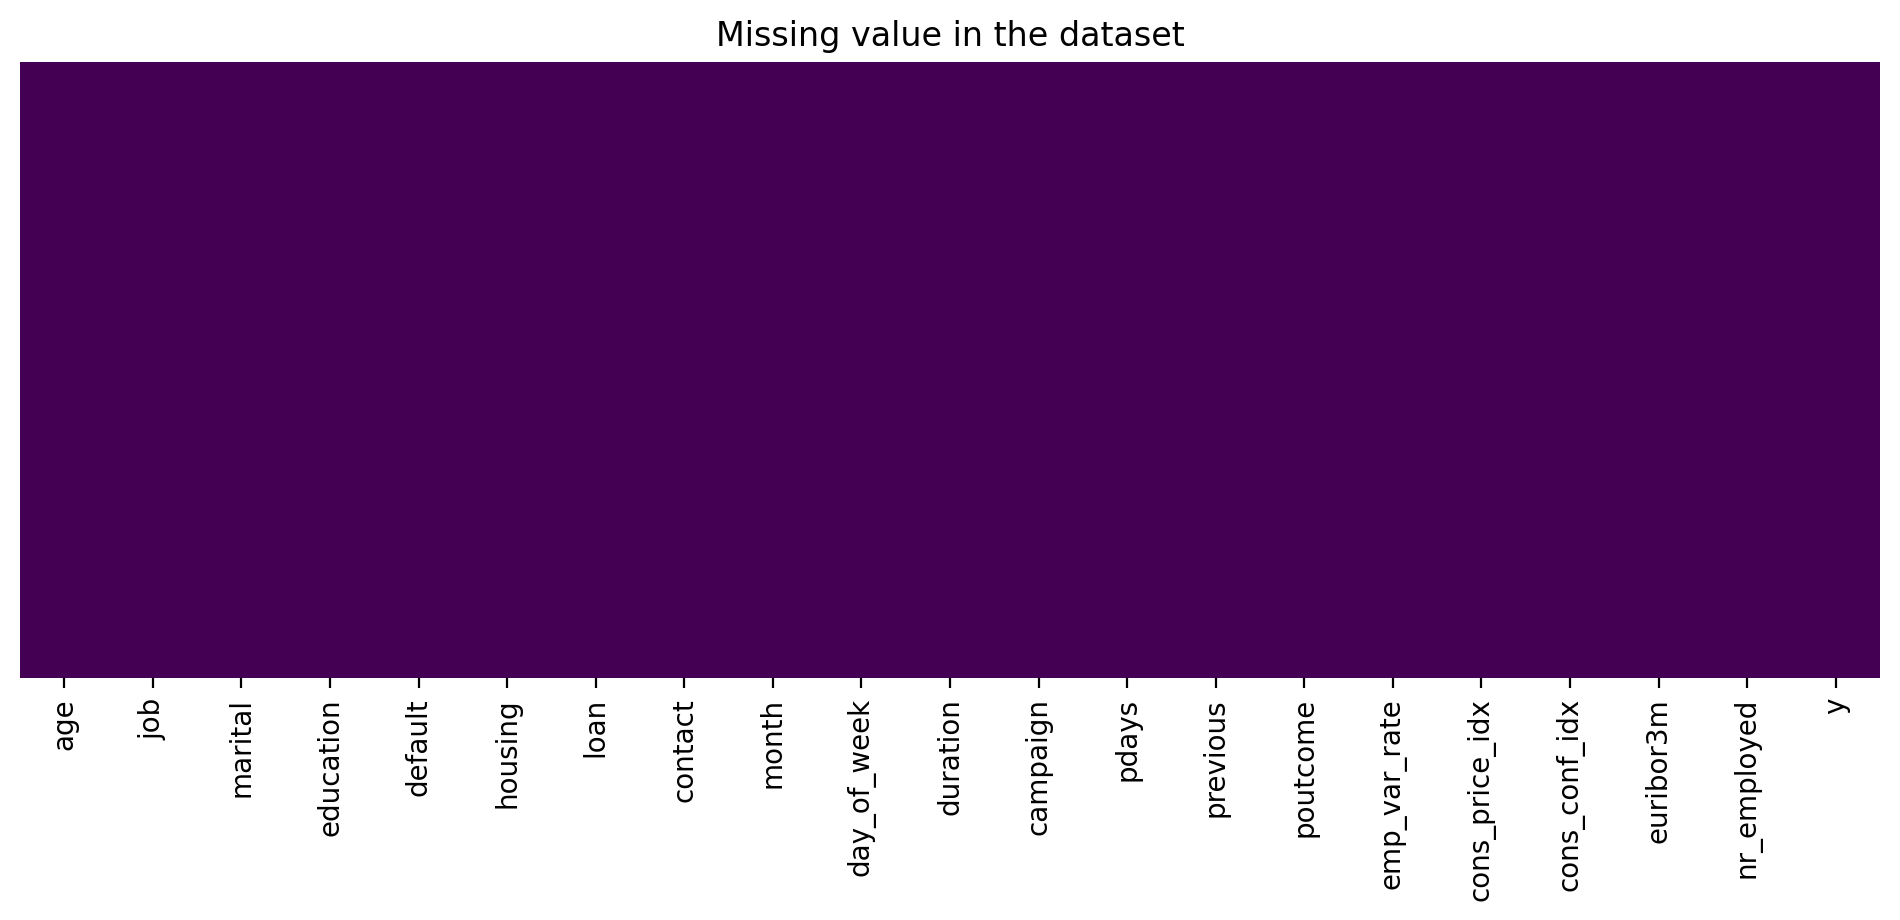

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There are no missing/unavailable value in the dataset

Columns in original data frame:
 ['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp_var_rate' 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed'
 'y']

Number of rows and columns in the dataset: (41188, 21)

Columns in data frame after encoding dummy variable:
 ['age' 'duration' 'campaign' 'pdays' 'previous' 'emp_var_rate'
 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed' 'y'
 'OHE_blue-collar' 'OHE_entrepreneur' 'OHE_housemaid' 'OHE_management'
 'OHE_retired' 'OHE_self-employed' 'OHE_services' 'OHE_student'
 'OHE_technician' 'OHE_unemployed' 'OHE_unknown' 'OHE_married'
 'OHE_single' 'OHE_unknown' 'OHE_basic.6y' 'OHE_basic.9y'
 'OHE_high.school' 'OHE_illiterate' 'OHE_professional.course'
 'OHE_university.degree' 'OHE_unknown' 'OHE_unknown' 'OHE_yes'
 'OHE_unknown' 'OHE_yes' 'OHE_unknown' 'OHE_yes' 'OHE_telephone' 'OHE_aug'
 'OHE_dec' 'OHE_jul' 'OHE_jun' 'OHE_mar' 'OHE

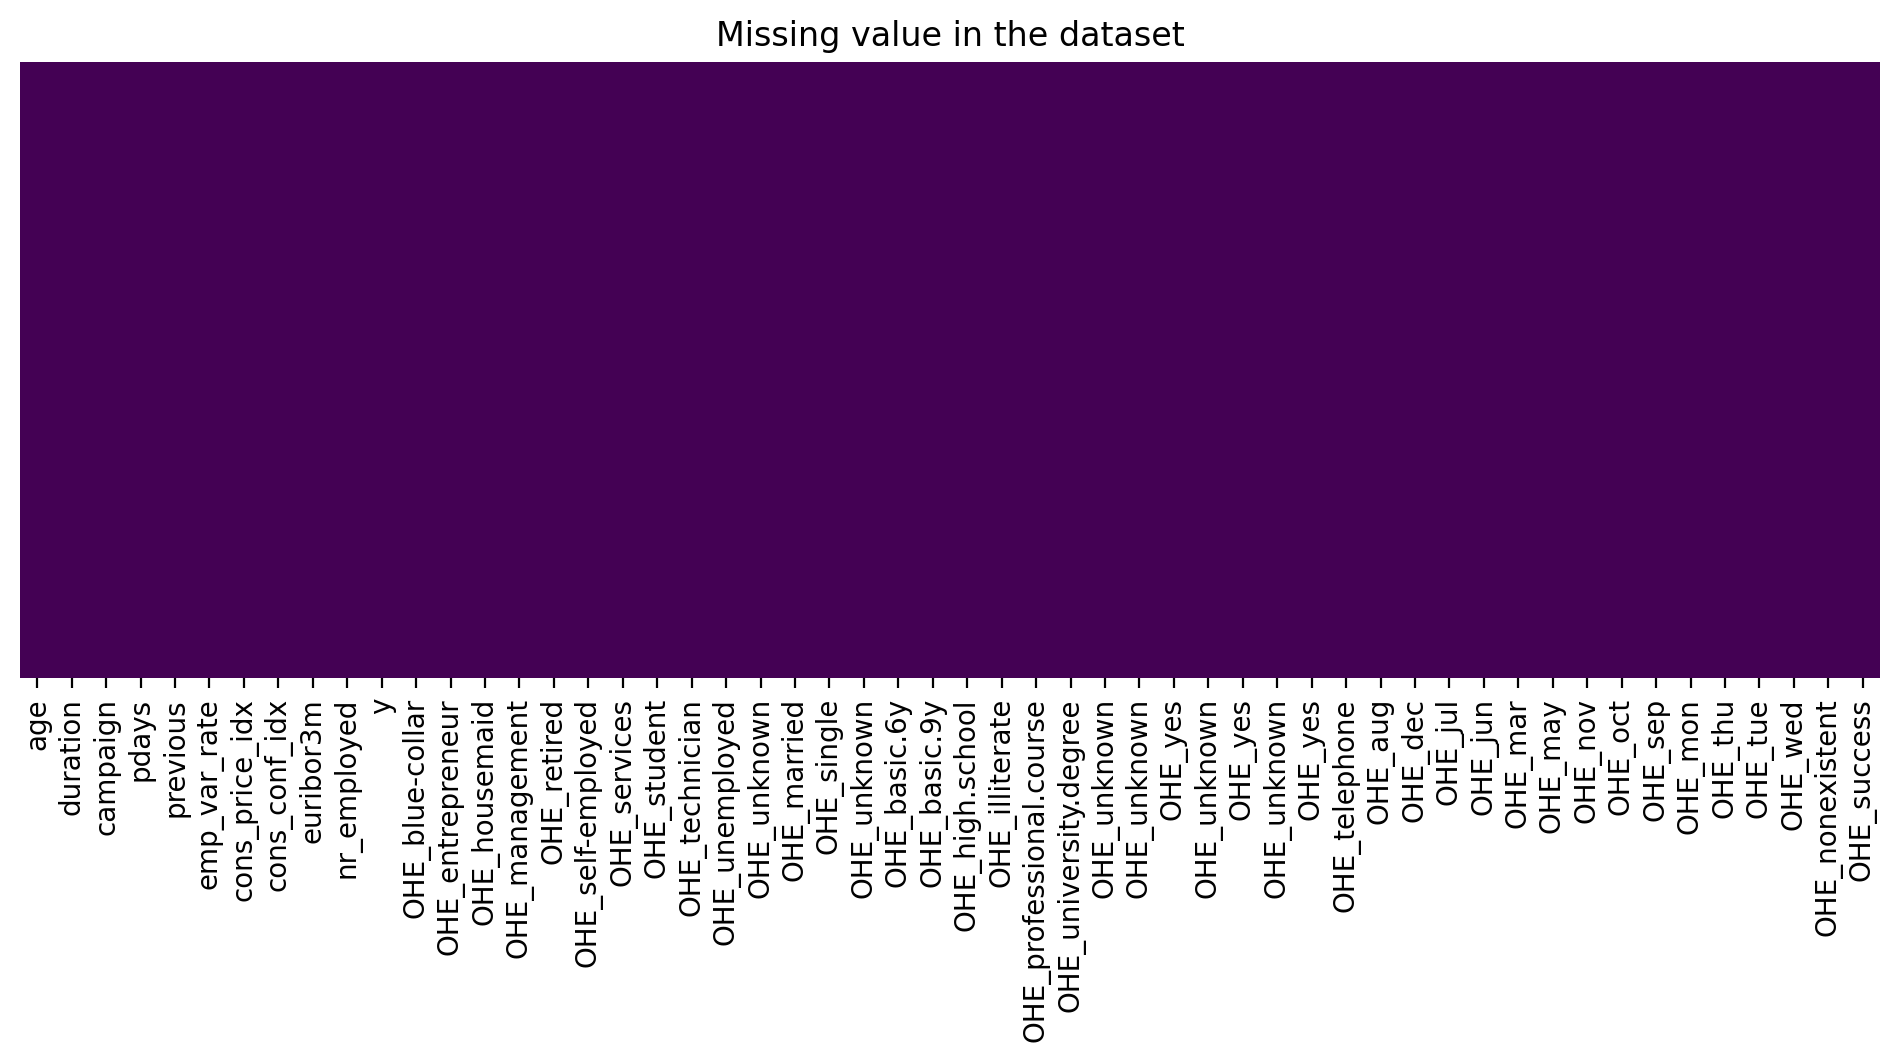

In [29]:
categorical_columns = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_', columns = categorical_columns, drop_first =True, dtype='int8')
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

plt.figure(figsize=(12,4))
sns.heatmap(df_encode.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

print('\n', df_encode.head())
print('\n', df_encode.tail())

In [44]:
# Splitting of the input data
X = df_encode.drop(columns=['y', 'duration'], axis=1)
y = df_encode[['y']]


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size = 0.3, random_state=20)
logistic_model = LogisticRegression(max_iter=100000)
logistic_model.fit(X_train, y_train_log)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=100000)

In [46]:
y_pred_log = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test_log, y_pred_log)
print('Model 1 Accuracy:', accuracy)

Model 1 Accuracy: 0.9004612770089827


In [47]:
print(classification_report(y_test_log, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10984
           1       0.65      0.22      0.33      1373

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [48]:
coefficients = logistic_model.coef_[0]
feature_names = X.columns
feature_coefficients = dict(zip(feature_names, coefficients))
sorted_features = sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True)
print("Top features influencing the prediction:")
for feature, coefficient in sorted_features[:5]:
    print(f"{feature}: {coefficient:.4f}")

Top features influencing the prediction:
cons_price_idx: 0.4390
OHE_jul: 0.1513
OHE_nonexistent: 0.1330
OHE_university.degree: 0.1116
OHE_mar: 0.0956


To get a realistic predictive model, I removed the duration dataset.

The consumer price index, job, education, outcome of previous campaign and month all affect the success of the marketing campaign.